In [ ]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d ashokkumarpalivela/potato-diseases

 71% 27.0M/37.8M [00:00<00:00, 70.8MB/s]
100% 37.8M/37.8M [00:00<00:00, 73.6MB/s]


In [ ]:
# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-diseases.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!ls

data  kaggle.json  potato-diseases.zip	sample_data


In [ ]:
#import all the necessary libraries
import os # for accessing the files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # visualize and process the image
import cv2 # open cv
from google.colab.patches import cv2_imshow # per cell e img show korar jnno within this window
from PIL import Image #read images and do some processes on it
from sklearn.model_selection import train_test_split

In [ ]:
early_blight_file =os.listdir( '/content/data/Early_blight')
print(early_blight_file[0:5])
print(early_blight_file[-5:])

['992a06a6-1aeb-4876-b33e-4267aa1a0c43___RS_Early.B 7618.JPG', 'd5673be4-4d62-4287-b9a4-3653b88d1604___RS_Early.B 8304.JPG', '6319585f-ed2f-4657-ae79-a23db65d0fce___RS_Early.B 7033.JPG', 'a8933319-d98e-4e71-a2ac-e22f7e1bca08___RS_Early.B 7499.JPG', '450b4a32-39ae-4daa-aeb6-87559afb0b42___RS_Early.B 9202.JPG']
['9ebf9d7d-0cfe-44f5-9126-89c70d38321a___RS_Early.B 8986.JPG', '5f209b64-4a3c-4fd4-9151-83db4125e7fc___RS_Early.B 7284.JPG', '5a7ca2a3-5bfc-47b7-9657-85a6c95a0956___RS_Early.B 7061.JPG', '320be8ee-2f9a-48f2-86fa-1c1d993a2fe2___RS_Early.B 8186.JPG', '1a38f06b-da2a-4c57-bef1-a73254896403___RS_Early.B 9178.JPG']


In [ ]:
healty_file =os.listdir( '/content/data/Healthy')
print(healty_file[0:5])
print(healty_file[-5:])

['0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.JPG', 'b89db9d3-a413-4781-bc88-5f6c2085ab5f___RS_HL 1909.JPG', '533abd3a-3e1d-42d0-ae9c-5189282b78af___RS_HL 5369.JPG', '71c06efe-089f-49b3-beed-095bd7640e32___RS_HL 1947.JPG', '4a08efaa-28cc-4356-8769-4002f4b299ef___RS_HL 1850.JPG']
['4ae82355-6885-40e7-9807-dabe46ed3441___RS_HL 5410.JPG', 'ef7005dc-1d44-412e-b858-145a2d7a6fa9___RS_HL 1951.JPG', '414f6249-9f78-4af5-9593-9d5a7e7d979f___RS_HL 1918.JPG', '20ac28d6-5708-4e31-8676-1b1979de094f___RS_HL 1735.JPG', 'aa04db6d-645f-4e8a-88dc-c9f9396f0800___RS_HL 1975.JPG']


In [ ]:
late_blight_file =os.listdir( '/content/data/Late_blight')
print(late_blight_file[0:5])
print(late_blight_file[-5:])

['6a6315ef-b37d-4067-80cd-bb2d8adf93ca___RS_LB 2919.JPG', 'a84f32fc-ec8a-42e9-9f43-9efcf6493199___RS_LB 4884.JPG', '523537e5-5795-40f6-ad49-9394aeca3f2e___RS_LB 3848.JPG', 'a0622f86-c94d-4b59-9483-68c57dee81fa___RS_LB 4794.JPG', 'faf67766-afc0-4f41-af0b-a3971fe325c7___RS_LB 4777.JPG']
['764311f2-6fd3-424d-aabc-9ad013a41997___RS_LB 3136.JPG', 'ea350085-28c1-4fc0-9fb9-386536cb971e___RS_LB 4890.JPG', '38d82b6e-16ec-4ac6-b42f-29ff524b4e43___RS_LB 5269.JPG', '49d18379-215d-427e-8662-9cde649d4a33___RS_LB 3163.JPG', 'c58de13c-b59d-4497-ae5a-08b425919b64___RS_LB 3116.JPG']


In [ ]:
print("Number of early blight :",len(early_blight_file))
print("Number of healthy :",len(healty_file))
print("Number of Late blight :",len(late_blight_file))

Number of early blight : 1000
Number of healthy : 152
Number of Late blight : 1000


Creating the label  <br>
0 => early blight <br>
1 => healthy <br>
2 => late blight

In [ ]:
early_blight_labels = [0]*1000
healty_labels = [1]*152
late_blight_labels = [2]*1000

In [ ]:
print("early blight first 5 labels ",early_blight_labels[0:5])
print("early blight last 5 labels ",early_blight_labels[-5:])

early blight first 5 labels  [0, 0, 0, 0, 0]
early blight last 5 labels  [0, 0, 0, 0, 0]


In [ ]:
print("healthy first 5 labels ",healty_labels[0:5])
print("healthy last 5 labels ",healty_labels[-5:])

healthy first 5 labels  [1, 1, 1, 1, 1]
healthy last 5 labels  [1, 1, 1, 1, 1]


In [ ]:
print("late blight first 5 labels ",late_blight_labels[0:5])
print("late blight 5 labels ",late_blight_labels[-5:])

late blight first 5 labels  [2, 2, 2, 2, 2]
late blight 5 labels  [2, 2, 2, 2, 2]


In [ ]:
print("Number of early blight labels:",len(early_blight_labels))
print("Number of healthy labels:",len(healty_labels))
print("Number of Late blight labels:",len(late_blight_labels))

Number of early blight labels: 1000
Number of healthy labels: 152
Number of Late blight labels: 1000


In [ ]:
labels = early_blight_labels + healty_labels + late_blight_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

2152
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


Displaying the image

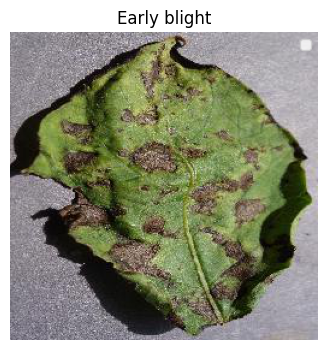

In [ ]:
plt.figure(figsize=(4,4))
img = mpimg.imread('/content/data/Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')
plt.imshow(img)
plt.axis('off')
plt.title("Early blight")
plt.legend()
plt.show()

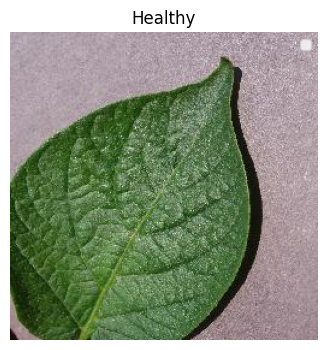

In [ ]:
plt.figure(figsize=(4,4))
img = mpimg.imread('/content/data/Healthy/0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG')
plt.imshow(img)
plt.axis('off')
plt.title("Healthy")
plt.legend()
plt.show()

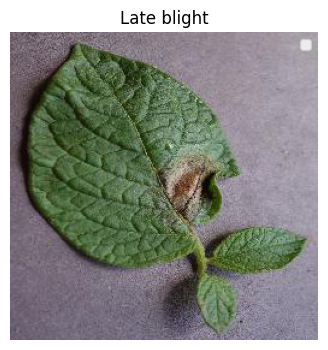

In [ ]:
plt.figure(figsize=(4,4))
img = mpimg.imread('/content/data/Late_blight/0085ef03-aec3-431a-99a1-de286e10c0cf___RS_LB 2949.JPG')
plt.imshow(img)
plt.axis('off')
plt.title("Late blight")
plt.legend()
plt.show()

Image processing <br>
resize the image <br>
convert the images into numpy arrays

In [ ]:
# convert the images into numpy arrays

early_blight_path = '/content/data/Early_blight/'
data = []

for image_file in  os.listdir(early_blight_path):
  image = Image.open(early_blight_path + image_file)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


healthy_path = '/content/data/Healthy/'

for image_file in  os.listdir(healthy_path):
  image = Image.open(healthy_path + image_file)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


late_blight_path = '/content/data/Late_blight/'

for image_file in  os.listdir(late_blight_path):
  image = Image.open(late_blight_path + image_file)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

print(len(data))

2152


In [ ]:
data[0]

array([[[184, 182, 196],
        [185, 183, 197],
        [197, 195, 209],
        ...,
        [139, 135, 150],
        [170, 166, 181],
        [180, 176, 191]],

       [[184, 182, 196],
        [178, 176, 190],
        [180, 178, 192],
        ...,
        [171, 167, 182],
        [158, 154, 169],
        [161, 157, 172]],

       [[181, 179, 193],
        [177, 175, 189],
        [182, 180, 194],
        ...,
        [143, 139, 154],
        [158, 154, 169],
        [197, 193, 208]],

       ...,

       [[223, 220, 227],
        [209, 206, 213],
        [207, 204, 211],
        ...,
        [195, 188, 196],
        [171, 164, 172],
        [182, 175, 183]],

       [[226, 223, 230],
        [212, 209, 216],
        [212, 209, 216],
        ...,
        [176, 169, 177],
        [136, 129, 137],
        [165, 158, 166]],

       [[220, 217, 224],
        [214, 211, 218],
        [219, 216, 223],
        ...,
        [158, 151, 159],
        [162, 155, 163],
        [181, 174, 182]]

In [ ]:
print('type of data :',type(data[0]))
print("Shape of the image :",data[0].shape)
print("type of the labels :",type(labels))

type of data : <class 'numpy.ndarray'>
Shape of the image : (256, 256, 3)
type of the labels : <class 'list'>


In [ ]:
# convert the image and label into numpy arrays
x = np.array(data)
y = np.array(labels)
print("type of x independent varible which contain images :",type(x))
print("type of y dependent variable which contain the image label (with mask/without mask)",type(y))

type of x independent varible which contain images : <class 'numpy.ndarray'>
type of y dependent variable which contain the image label (with mask/without mask) <class 'numpy.ndarray'>


In [ ]:
print("x",x[0])
print('\n')
print('y',y[0])

x [[[184 182 196]
  [185 183 197]
  [197 195 209]
  ...
  [139 135 150]
  [170 166 181]
  [180 176 191]]

 [[184 182 196]
  [178 176 190]
  [180 178 192]
  ...
  [171 167 182]
  [158 154 169]
  [161 157 172]]

 [[181 179 193]
  [177 175 189]
  [182 180 194]
  ...
  [143 139 154]
  [158 154 169]
  [197 193 208]]

 ...

 [[223 220 227]
  [209 206 213]
  [207 204 211]
  ...
  [195 188 196]
  [171 164 172]
  [182 175 183]]

 [[226 223 230]
  [212 209 216]
  [212 209 216]
  ...
  [176 169 177]
  [136 129 137]
  [165 158 166]]

 [[220 217 224]
  [214 211 218]
  [219 216 223]
  ...
  [158 151 159]
  [162 155 163]
  [181 174 182]]]


y 0


In [ ]:
print("The shape of x :",x.shape)
print("The shape of y :",y.shape)

The shape of x : (2152, 256, 256, 3)
The shape of y : (2152,)


Now spliting the data for traning and testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=2)

In [ ]:
print("x shape ",x.shape)
print("x_train shape ",x_train.shape)
print("x_test shape ",x_test.shape)

x shape  (2152, 256, 256, 3)
x_train shape  (1936, 256, 256, 3)
x_test shape  (216, 256, 256, 3)


In [ ]:
print("y shape ",y.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

y shape  (2152,)
y_train shape  (1936,)
y_test shape  (216,)


Scaling the data

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
print("x_train before scaling ",x_train[0])
print("x_train after scaling ",x_train_scaled[0].round(2))

x_train before scaling  [[[157 154 171]
  [ 96  93 110]
  [127 124 141]
  ...
  [136 137 155]
  [135 136 154]
  [134 135 153]]

 [[101  98 115]
  [ 93  90 107]
  [100  97 114]
  ...
  [133 134 152]
  [132 133 151]
  [131 132 150]]

 [[111 108 125]
  [104 101 118]
  [113 110 127]
  ...
  [132 133 151]
  [131 132 150]
  [130 131 149]]

 ...

 [[150 148 169]
  [113 111 132]
  [106 104 125]
  ...
  [174 173 189]
  [180 179 195]
  [187 186 202]]

 [[116 114 136]
  [122 120 142]
  [152 150 172]
  ...
  [178 177 193]
  [181 180 196]
  [188 187 203]]

 [[127 125 147]
  [112 110 132]
  [108 106 128]
  ...
  [172 171 187]
  [172 171 187]
  [177 176 192]]]
x_train after scaling  [[[0.62 0.6  0.67]
  [0.38 0.36 0.43]
  [0.5  0.49 0.55]
  ...
  [0.53 0.54 0.61]
  [0.53 0.53 0.6 ]
  [0.53 0.53 0.6 ]]

 [[0.4  0.38 0.45]
  [0.36 0.35 0.42]
  [0.39 0.38 0.45]
  ...
  [0.52 0.53 0.6 ]
  [0.52 0.52 0.59]
  [0.51 0.52 0.59]]

 [[0.44 0.42 0.49]
  [0.41 0.4  0.46]
  [0.44 0.43 0.5 ]
  ...
  [0.52 0.52 0.5

Building our CNN model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
from keras.engine.sequential import Sequential
model = Sequential()
# first layer
model.add(Conv2D(32,kernel_size = (3,3),activation ='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd layer
model.add(Conv2D(64,kernel_size = (2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten layer
model.add(Flatten())

#Dense layer
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(81,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(27,activation = 'relu'))
model.add(Dropout(0.5))
#output layer
model.add(Dense(3,activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
# compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = 'acc')

In [ ]:
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)
y_train.shape

(1936, 3)

In [ ]:

history = model.fit(x_train_scaled,
                    y_train,
                    validation_split = 0.1,
                    epochs = 5)

Epoch 1/5
55/55 [==============================] - 17s 102ms/step - loss: 2.0094 - acc: 0.4432 - val_loss: 0.9896 - val_acc: 0.4330
Epoch 2/5
55/55 [==============================] - 4s 66ms/step - loss: 0.9665 - acc: 0.4782 - val_loss: 0.8672 - val_acc: 0.5619
Epoch 3/5
55/55 [==============================] - 4s 68ms/step - loss: 0.8106 - acc: 0.6361 - val_loss: 0.5984 - val_acc: 0.8093
Epoch 4/5
55/55 [==============================] - 4s 70ms/step - loss: 0.6144 - acc: 0.7681 - val_loss: 0.4240 - val_acc: 0.8814
Epoch 5/5
55/55 [==============================] - 3s 56ms/step - loss: 0.4919 - acc: 0.8289 - val_loss: 0.4209 - val_acc: 0.8660


In [ ]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print("Loss ",loss)
print("Accuracy",accuracy)

7/7 [==============================] - 0s 63ms/step - loss: 0.4267 - acc: 0.8426
Loss  0.42670464515686035
Accuracy 0.8425925970077515


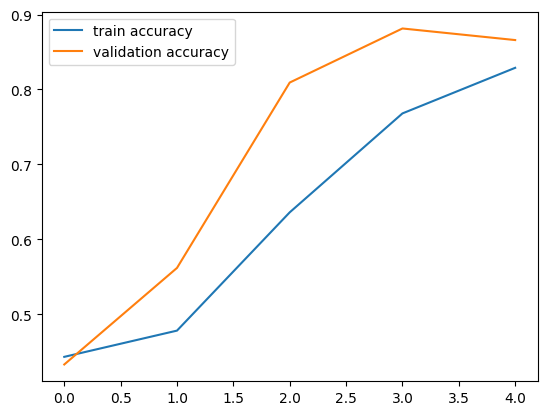

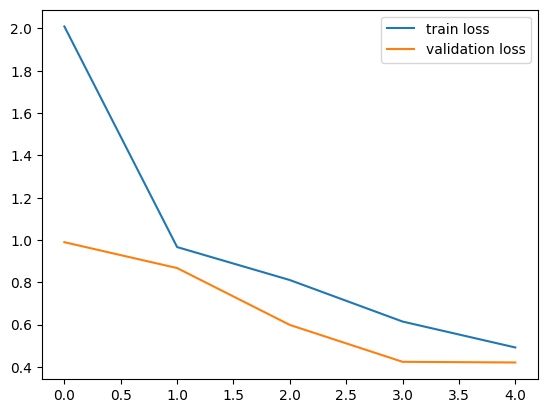

In [ ]:
h = history
#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label = 'validation accuracy')
plt.legend()
plt.show()

#plot the loss value
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

Give the image path :/content/data/Healthy/04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG


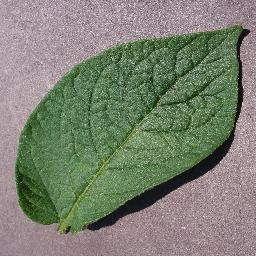

1/1 [==============================] - 0s 164ms/step
Probability of early_Blight,healty,and late_blight [[0.04 0.06 0.91]]
label prediction  2
late blight


In [ ]:
input_image_path = input("Give the image path :")
take_image = cv2.imread(input_image_path)

cv2_imshow(take_image)

take_image_resize = cv2.resize(take_image,(256,256))
take_image_scaled = take_image_resize/255
take_image_reshape = np.reshape(take_image_scaled,[1,256,256,3])
prediction = model.predict(take_image_reshape)


print("Probability of early_Blight,healty,and late_blight",prediction.round(2))

label_prediction = np.argmax(prediction)
print("label prediction ",label_prediction)

if label_prediction ==0:
  print('early_blight')
elif label_prediction == 1:
  print('Healthy')
else:
  print("late blight")


Give the image path :/content/data/Healthy/04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG


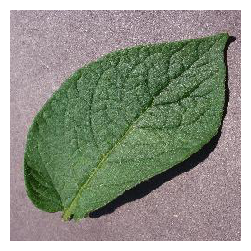

1/1 [==============================] - 0s 21ms/step
early_Blight


In [ ]:
labels = ['early_Blight','Healthy','Late_blight']
input_image_path = input("Give the image path :")
img = cv2.imread(input_image_path)
img = cv2.resize(img,(256,256))
img_array = np.array(img)
img_array = img_array.reshape(1,256,256,3)

from tensorflow.keras.preprocessing import image
plt.figure(figsize=(4,3))
img = image.load_img(input_image_path)
plt.imshow(img,interpolation='nearest')
plt.axis('off')
plt.show()

a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])